# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [2]:
apo_D34_file   = 'data/indiv_hbonds_D34_apo_stage11_to_65.dat'
apo_D214_file  = 'data/indiv_hbonds_D214_apo_stage11_to_65.dat'
holo_D34_file  = 'data/indiv_hbonds_D34_holo_stage21_to_42.dat' 
holo_D214_file = 'data/indiv_hbonds_D214_holo_stage21_to_42.dat'

# Collect Data

In [3]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [4]:
apo_D34_data   = data_collect(apo_D34_file)
apo_D214_data  = data_collect(apo_D214_file)
holo_D34_data  = data_collect(holo_D34_file)
holo_D214_data = data_collect(holo_D214_file)

In [5]:
data_list = [apo_D34_data, apo_D214_data, holo_D34_data, holo_D214_data]
name_list = ['Apo D34', 'Apo D214', 'Holo D34', 'Holo D214']

# Plot Data Settings

## Colors

In [6]:
# Cool
C1 = ('#00FFFF') # Cyan
C2 = ('#8000FF') # Purple
C3 = ('#FF00FC') # Pink 
C4 = ('#0019FF') # Blue Blue
# Hot 
C5 = ('#FF0074') # Magenta
C6 = ('#80FF00') # Green
C7 = ('#FF8300') # Orange
C8 = ('#BB8B17') # Brown
C9 = ('#FF0000') # Red


black = ('Black')
Cools = [C1, C2, C3, C4, black] # D34
Hots = [C5, C6, C7, C8, C9, black] # D214

## Global Settings

In [7]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [8]:
ink_x = 1.4 # 1.4
ink_y = 0.9 # 1.4

ink_markersize  = 2
ink_linewidth = 1

# Make Plots

In [9]:
apo_legend1 = ["S37:HG1-D34:OD*", "G36:HN-D34:OD*", "T35:HN-D34:OD*", "D214:HD*-D34:OD*"]
apo_legend2 = ["T35:HG1-D214:OD*", "S215:HN-D214:OD*", "G216:HN-D214:OD*", "T217:SC/BB-D214:OD*", "D34:HD*-D214:OD*"]
holo_legend1 = ["S37:HG1-D34:OD*", "G36:HN-D34:OD*", "T35:HN-D34:OD*", "D214:HD*-D34:OD*", "Lig:H24-D34:OD*"]
holo_legend2 = ["T34:HG1-D214:OD*", "S215:HN-D214:OD*", "G216:HN-D214:OD*", "T217:SC/BB-D214:OD*", "D34:HD*-D214:OD*", "Lig:H24-D214:OD*"]
legends = [apo_legend1, apo_legend2, holo_legend1, holo_legend2]

In [10]:
# Fold Cell
plt.close('all')

figcols = 2
figrows = 2

fig, axes = plt.subplots(nrows=figrows, ncols=figcols, figsize=(12, 8))
axes = axes.flatten()

for index in range(figcols*figrows):
    #Data
    for n in range(1, len(data_list[index][0])):
        if index == 0 or index == 2:
            axes[index].plot([x[0] for x in data_list[index]],[y[n] for y in data_list[index]], 'o-', color=Cools[n-1])
        else:
            axes[index].plot([x[0] for x in data_list[index]],[y[n] for y in data_list[index]], 'o-', color=Hots[n-1])
                

    #Plot Details
    axes[index].spines['top'].set_visible(False)
    axes[index].spines['right'].set_visible(False)

    axes[index].set_title('{}'.format(name_list[index]))
    axes[index].legend(legends[index])
    # Y-Axis
    if index == 0 or index == 2:
        axes[index].set_ylabel('P(H-Bond)', fontsize=15)
        
    axes[index].set_ylim(0, 1)
    axes[index].set_yticks([0, 0.5, 1.0])
    axes[index].tick_params(axis='y', labelsize=15)
    axes[index].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelleft=True)

    # X-Axis
    if index == 2 or index == 3:
        axes[index].set_xlabel('pH', fontsize=15)
    axes[index].set_xlim(1, 9)
    axes[index].set_xticks([1, 3, 5, 7, 9])
    axes[index].tick_params(axis='x', labelsize=15)
    axes[index].xaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelbottom=True)



plt.tight_layout()
plt.savefig('plots/SI_indiv_HB_interactions.png', dpi=360)
plt.show()

# Plot Apo/Holo D34 Data

## w/ Labels

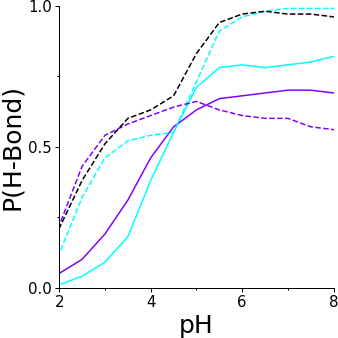

In [11]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
index = 0 # for Apo D34 
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '-', color=Cools[n-1])

index = 2 # for Holo D34
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '--', color=Cools[n-1])


# plot labels
legend = ['D34', 'D214']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(H-Bond)', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

## w/o Labels

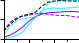

In [12]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
index = 0 # for Apo D34 
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '-', color=Cools[n-1], markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
        
index = 2 # for Apo D34 
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '--', color=Cools[n-1], markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)



# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(1))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/indiv_D34.png", dpi=360, transparent=True)
plt.show()

# Plot Apo D214 Data

## w/ Labels

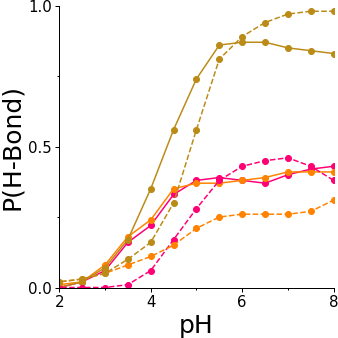

In [13]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
index = 1 # for Apo D214
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], 'o-', color=Hots[n-1])
        
index = 3 # for Holo D214
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], 'o--', color=Hots[n-1])


# plot labels
legend = ['D34', 'D214']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(H-Bond)', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

## w/o Labels

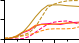

In [14]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
index = 1 # for Apo D214
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '-', color=Hots[n-1], markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)
        
index = 3 # for Apo D214
for n in range(1, len(data_list[index][0])):
    if max([y[n] for y in data_list[index]]) > 0.25:
        axes.plot([x[0] for x in data_list[index]], [y[n] for y in data_list[index]], '--', color=Hots[n-1], markersize=ink_markersize, linewidth=ink_linewidth, clip_on=True)        




# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(1))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("plots/indiv_D214.png", dpi=360, transparent=True)
plt.show()